# **Finding the right place for Food Cart Locations**

## **Objective**
Use **Classic Metaheuristics** to **optimize the placement of food carts in a city**, 
minimizing the **total weighted walking distance** from customer hotspots.


## **Problem Statement**
A city wants to **optimize food cart placements** to **minimize the total walking distance** 
for customers from key locations (e.g., office buildings, parks, public squares). 
The food carts should be placed within a **bounded city area**, 
and their positions should be adjusted iteratively using different optimization strategies.

## **Problem Details**
1. **City Layout**
   - The city is modeled as a **1 km × 1 km** grid.
   - There are **M customer hotspots** representing high-demand areas.
   - There are **N food carts** to be placed optimally.

2. **Objective Function**
   - Minimize the **total weighted distance** from customers to their nearest food cart:

     $ f(\mathbf{X}) = \sum_{i=1}^{M} p_i \cdot \min_{j \in N} d(\mathbf{x}_i, \mathbf{c}_j) $

     where:
     - $ p_i $ = population demand at customer hotspot **i**.
     - $ d(\mathbf{x}_i, \mathbf{c}_j) $ = **Euclidean distance** between customer location $ \mathbf{x}_i $
       and the nearest food cart $ \mathbf{c}_j $.

## **Optimization Approaches**
Students must implement **three optimization strategies** and compare their performance:

1. **Random Search**  

2. **Hill Climber**  

3. **Simulated Annealing**  

## **Tasks**
1. **Define the problem setup** (city grid, customer hotspots, and food carts).
2. **Implement the objective function** to measure walking distances.
3. **Implement three optimization algorithms**:
   - **Random Search**
   - **Hill Climber**
   - **Simulated Annealing**
4. **Visualize the initial and optimized food cart locations** on a 2D map.
5. **Compare the results** across the three approaches:
   - Measure the final **total weighted walking distance** for each approach.
   - Compare the efficiency and effectiveness of each method.

## **Deliverables**
1. **Python implementation** of the three optimization algorithms.
2. **Before and after visualizations** of food cart placement.
3. **Comparison table** showing performance across the three methods.
4. **Analysis**:
   - How much did the **total weighted walking distance** decrease?
   - Which algorithm performed the best?
   - How does changing the **cooling rate** affect Simulated Annealing?


In [147]:

import numpy as np
import random
import math
import matplotlib.pyplot as plt


## **1. Define City Model**

In [148]:

np.random.seed(2025) # to ensure reproducibility
random.seed(2025) # to ensure reproducibility

# City dimensions (1 km x 1 km)
CITY_WIDTH, CITY_HEIGHT = 1000, 1000  # in meters

# Number of food carts
N = 10  

# Number of customer hotspots
M = 15  

# Generate random customer hotspots with demand values
customer_hotspots = np.random.rand(M, 2) * [CITY_WIDTH, CITY_HEIGHT]
customer_demand = np.random.randint(50, 300, size=M)  # Each hotspot has a demand

# Generate random initial positions for food carts
food_carts = np.random.rand(N, 2) * [CITY_WIDTH, CITY_HEIGHT]


## **2. Define Objective Function**

In [149]:

# Function to compute Euclidean distance
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Compute total weighted distance from hotspots to nearest food cart
def total_customer_distance(food_carts, customer_hotspots, customer_demand):
    total_distance = 0
    for i in range(M):
        # Find the nearest food cart to the customer hotspot
        min_distance = min(euclidean_distance(customer_hotspots[i], food_carts[j]) for j in range(N))
        total_distance += customer_demand[i] * min_distance  # Weighted by demand
    return total_distance


## **3. Implement Simulated Annealing**

In [150]:

# Simulated Annealing implementation
def simulated_annealing(food_carts, customer_hotspots, customer_demand, T0=50, alpha=10, iterations=2000, cooling='logarithmic'):
    T = T0
    current_solution = np.copy(food_carts)
    best_solution = np.copy(food_carts)
    best_cost = total_customer_distance(current_solution, customer_hotspots, customer_demand)
    
    # TODO: YOUR CODE HERE
    for i in range(iterations): # Stop criteria

        # Generate a random neighbor solution
        neighbor_solution = np.copy(current_solution)
        for j in range(N):
            neighbor_solution[j] += np.random.normal(0, 10, 2)  # Add noise to each food cart position so we can explore the solution space
            neighbor_solution[j] = np.clip(neighbor_solution[j], 0, [CITY_WIDTH, CITY_HEIGHT])  # Ensure food cart is within city bounds, if not clip it to the nearest edge
        
        # Compute cost of neighbor solution
        neighbor_cost = total_customer_distance(neighbor_solution, customer_hotspots, customer_demand)
        
        # Accept the neighbor solution under certain conditions
        if neighbor_cost < best_cost:
            best_solution = np.copy(neighbor_solution)
            best_cost = neighbor_cost

        # Accept the neighbor solution with a certain probability (This is what differentiates SA from HC)
        if neighbor_cost < best_cost or random.random() < math.exp((best_cost - neighbor_cost) / T):
            current_solution = np.copy(neighbor_solution)
        
        # Update temperature according to a cooling (linear, exponential or logarithmic)
        # Let's use logarithmic cooling
        if cooling == 'logarithmic':
            T = T0 / math.log(i + 2)
        

        # linear cooling
        if cooling == 'linear':
            T = T0 - alpha * i

        # exponential cooling
        if cooling == 'exponential':
            T = T0 * math.exp(-alpha * i)

        if T <= 0:
            T = 0.0001  # Prevent division by zero
    
    return best_solution, best_cost


## **4. Run SA and Visualize Results**

In [151]:

# Function to plot city layout
def plot_city(food_carts, customer_hotspots, title):
    plt.figure(figsize=(8, 8))
    plt.scatter(food_carts[:, 0], food_carts[:, 1], c='blue', marker='o', label='Food Carts', s=100)
    plt.scatter(customer_hotspots[:, 0], customer_hotspots[:, 1], c='red', marker='x', label='Customer Hotspots', s=80)
    
    # Draw lines from hotspots to the nearest food cart
    for i in range(M):
        nearest_cart = min(food_carts, key=lambda c: euclidean_distance(customer_hotspots[i], c))
        plt.plot([customer_hotspots[i][0], nearest_cart[0]], 
                 [customer_hotspots[i][1], nearest_cart[1]], 'gray', linestyle='dotted')

    plt.xlim(0, CITY_WIDTH)
    plt.ylim(0, CITY_HEIGHT)
    plt.xlabel("City Width (m)")
    plt.ylabel("City Height (m)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


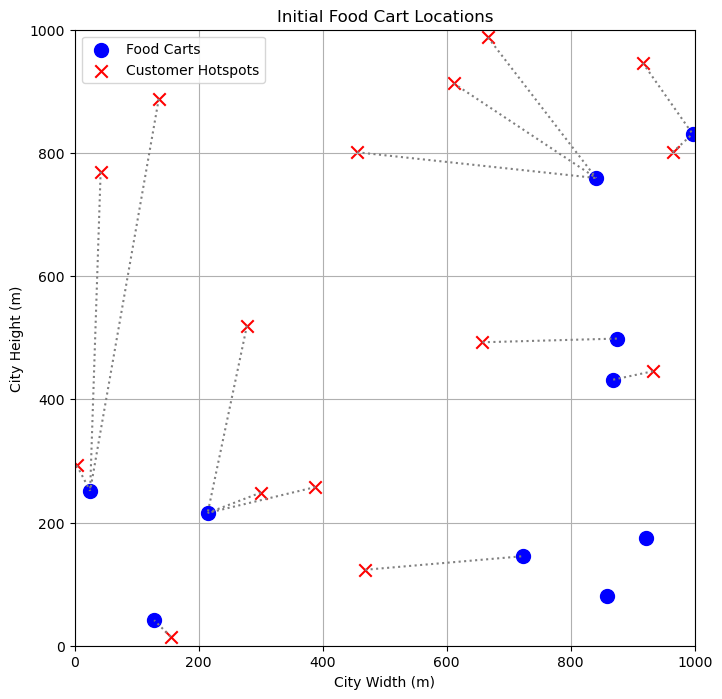

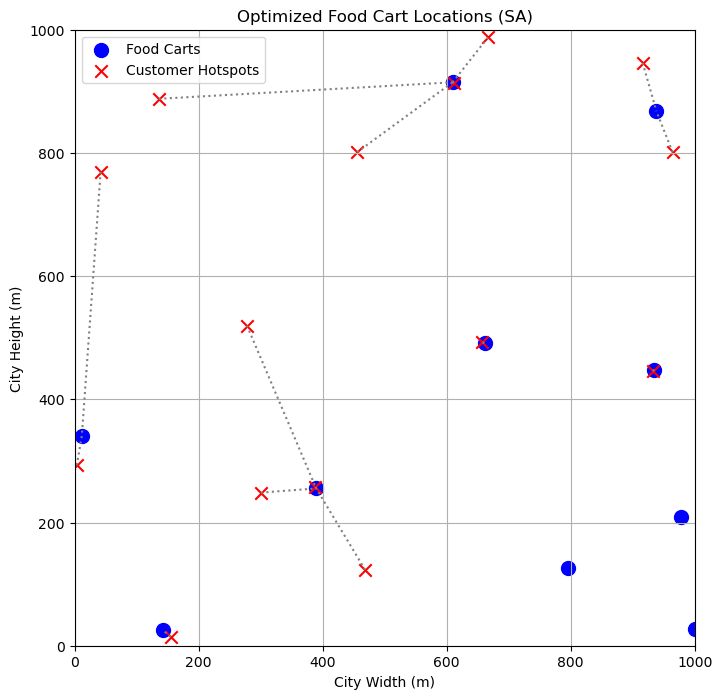

335934.80394878046

In [152]:

# Plot initial city layout
plot_city(food_carts, customer_hotspots, "Initial Food Cart Locations")

# Run SA optimization
optimized_food_carts, optimized_distance = simulated_annealing(food_carts, customer_hotspots, customer_demand)

# Plot optimized city layout
plot_city(optimized_food_carts, customer_hotspots, "Optimized Food Cart Locations (SA)")

# Return final optimized total distance
optimized_distance


## **5. Implement Random Search**

In [153]:

def random_search(customer_hotspots, customer_demand, num_iterations=5000):
    best_solution = np.random.rand(N, 2) * [CITY_WIDTH, CITY_HEIGHT]
    best_cost = total_customer_distance(best_solution, customer_hotspots, customer_demand)

    # TODO: YOUR CODE HERE
    for i in range(num_iterations):
        new_solution = np.random.rand(N, 2) * [CITY_WIDTH, CITY_HEIGHT]
        new_cost = total_customer_distance(new_solution, customer_hotspots, customer_demand)
        
        if new_cost < best_cost:
            best_solution = np.copy(new_solution)
            best_cost = new_cost
            
    return best_solution, best_cost

random_solution, random_cost = random_search(customer_hotspots, customer_demand)

random_cost


296355.9988437931

## **6. Implement Hill Climber**

In [154]:

def hill_climber(food_carts, customer_hotspots, customer_demand, iterations=1000):
    current_solution = np.copy(food_carts)
    best_solution = np.copy(food_carts)
    best_cost = total_customer_distance(current_solution, customer_hotspots, customer_demand)

    # TODO: YOUR CODE HERE
    for i in range(iterations):
        neighbor_solution = np.copy(current_solution)
        for j in range(N):
            neighbor_solution[j] += np.random.normal(0, 10, 2)  # Add noise to each food cart position so we can explore the solution space
            neighbor_solution[j] = np.clip(neighbor_solution[j], 0, [CITY_WIDTH, CITY_HEIGHT])  # Ensure food cart is within city bounds, if not clip it to the nearest edge
        
        neighbor_cost = total_customer_distance(neighbor_solution, customer_hotspots, customer_demand)
        
        if neighbor_cost < best_cost:
            best_solution = np.copy(neighbor_solution)
            best_cost = neighbor_cost
            current_solution = np.copy(neighbor_solution)

    return best_solution, best_cost

hill_solution, hill_cost = hill_climber(food_carts, customer_hotspots, customer_demand)
# plot_city(hill_solution, customer_hotspots, "Optimized Food Cart Locations (Hill Climber)")
hill_cost


294477.1352294686

## **7. Run All Approaches and Compare Results**

In [155]:
# Function to plot all approaches in a single figure
def plot_all_methods(random_solution, hill_solution, sim_annealing_solution, customer_hotspots):
    plt.figure(figsize=(8, 8))
    
    # Plot customer hotspots
    plt.scatter(customer_hotspots[:, 0], customer_hotspots[:, 1], c='red', marker='x', label='Customer Hotspots', s=80)

    # Plot Random Search locations
    plt.scatter(random_solution[:, 0], random_solution[:, 1], c='blue', marker='o', label='Random Search', s=100)

    # Plot Hill Climber locations
    plt.scatter(hill_solution[:, 0], hill_solution[:, 1], c='green', marker='s', label='Hill Climber', s=100)

    # Plot Simulated Annealing locations
    plt.scatter(sim_annealing_solution[:, 0], sim_annealing_solution[:, 1], c='purple', marker='D', label='Simulated Annealing', s=100)

    plt.xlim(0, CITY_WIDTH)
    plt.ylim(0, CITY_HEIGHT)
    plt.xlabel("City Width (m)")
    plt.ylabel("City Height (m)")
    plt.title("Comparison of Optimization Approaches")
    plt.legend()
    plt.grid(True)
    plt.show()



Comparison of Optimization Methods:
Random Search Distance: 296356.00
Hill Climber Distance: 294477.14
Simulated Annealing Distance: 241650.14


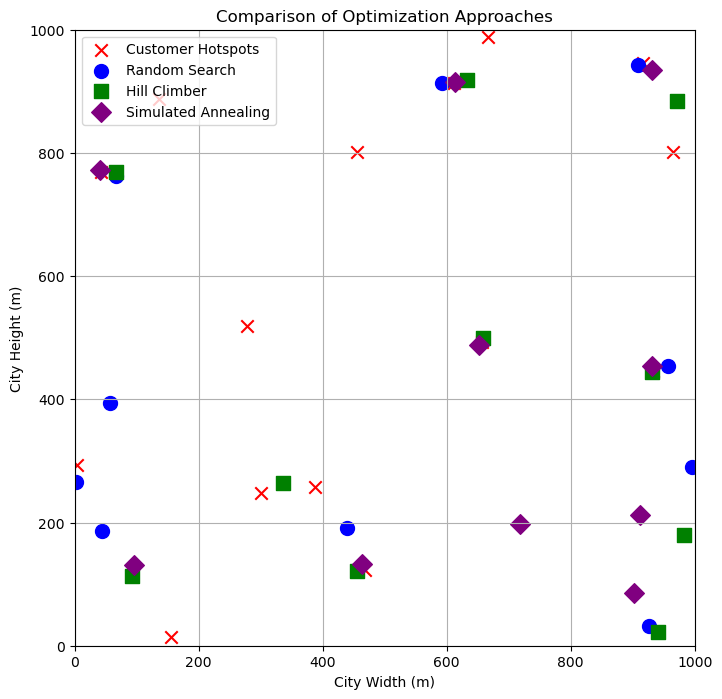

In [156]:

# Run Random Search
best_random_solution, best_random_cost = random_search(customer_hotspots, customer_demand)

# Run Hill Climber
best_hill_solution, best_hill_cost = hill_climber(food_carts, customer_hotspots, customer_demand)

# Run Simulated Annealing
best_sim_annealing_solution, best_sim_annealing_cost = simulated_annealing(food_carts, customer_hotspots, customer_demand, T0=1000, cooling='logarithmic', alpha=0.995)

# Print comparison results
print("Comparison of Optimization Methods:")
print(f"Random Search Distance: {random_cost:.2f}")
print(f"Hill Climber Distance: {hill_cost:.2f}")
print(f"Simulated Annealing Distance: {best_sim_annealing_cost:.2f}")

# Plot all methods together
plot_all_methods(best_random_solution, best_hill_solution, best_sim_annealing_solution, customer_hotspots)

# Plot results
# plot_city(random_solution, customer_hotspots, "Random Search - Optimized Food Cart Locations")
# plot_city(hill_solution, customer_hotspots, "Hill Climber - Optimized Food Cart Locations")
# plot_city(sim_annealing_solution, customer_hotspots, "Simulated Annealing - Optimized Food Cart Locations")


In [157]:
# lets run the simulated annealing with different cooling schedules and different initial temperatures and different alpha values
akphas = [0.9, 0.95, 0.99]
cooling_schedules = ['linear', 'exponential', 'logarithmic']
initial_temperatures = [100, 500, 1000]

for cooling in cooling_schedules:
    for temp in initial_temperatures:
        for alpha in akphas:
            best_sim_annealing_solution, best_sim_annealing_cost = simulated_annealing(food_carts, customer_hotspots, customer_demand, T0=temp, alpha=alpha, cooling=cooling)
            print(f"Simulated Annealing Distance (T0={temp}, Alpha={alpha}, Cooling={cooling}): {best_sim_annealing_cost:.2f}")

Simulated Annealing Distance (T0=100, Alpha=0.9, Cooling=linear): 304082.19
Simulated Annealing Distance (T0=100, Alpha=0.95, Cooling=linear): 206854.30
Simulated Annealing Distance (T0=100, Alpha=0.99, Cooling=linear): 335637.51
Simulated Annealing Distance (T0=500, Alpha=0.9, Cooling=linear): 237259.93
Simulated Annealing Distance (T0=500, Alpha=0.95, Cooling=linear): 221488.64
Simulated Annealing Distance (T0=500, Alpha=0.99, Cooling=linear): 335939.17
Simulated Annealing Distance (T0=1000, Alpha=0.9, Cooling=linear): 333394.89
Simulated Annealing Distance (T0=1000, Alpha=0.95, Cooling=linear): 255732.01
Simulated Annealing Distance (T0=1000, Alpha=0.99, Cooling=linear): 188619.12


C:\Users\PC\AppData\Local\Temp\ipykernel_336\2282405123.py:26: RuntimeWarning: overflow encountered in scalar divide
  if neighbor_cost < best_cost or random.random() < math.exp((best_cost - neighbor_cost) / T):


Simulated Annealing Distance (T0=100, Alpha=0.9, Cooling=exponential): 303590.15
Simulated Annealing Distance (T0=100, Alpha=0.95, Cooling=exponential): 303113.44
Simulated Annealing Distance (T0=100, Alpha=0.99, Cooling=exponential): 227329.67
Simulated Annealing Distance (T0=500, Alpha=0.9, Cooling=exponential): 208335.30
Simulated Annealing Distance (T0=500, Alpha=0.95, Cooling=exponential): 304419.23
Simulated Annealing Distance (T0=500, Alpha=0.99, Cooling=exponential): 305642.56
Simulated Annealing Distance (T0=1000, Alpha=0.9, Cooling=exponential): 219338.78
Simulated Annealing Distance (T0=1000, Alpha=0.95, Cooling=exponential): 303855.64
Simulated Annealing Distance (T0=1000, Alpha=0.99, Cooling=exponential): 337508.72
Simulated Annealing Distance (T0=100, Alpha=0.9, Cooling=logarithmic): 306153.40
Simulated Annealing Distance (T0=100, Alpha=0.95, Cooling=logarithmic): 182998.35
Simulated Annealing Distance (T0=100, Alpha=0.99, Cooling=logarithmic): 186755.29
Simulated Anneali